In [ ]:
!pip install langgraph    

You should consider upgrading via the '/Users/rohitbohra/Documents/falcon-env/bin/python3 -m pip install --upgrade pip' command.


In [1]:
# first function
def function_1(input_1):
    return input_1 + " Hi "


def function_2(input_2):
    return input_2 + "there "

In [2]:
from langgraph.graph import Graph

# define a Langchain graph
workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

/Users/rohitbohra/Documents/falcon-env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
app.invoke("Hello")

'Hello Hi there '

In [4]:
input = "Hello"
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}': ")
        print("---")
        print(value)
        
    print("\n---\n")

Output from node 'node_1': 
---
Hello Hi 

---

Output from node 'node_2': 
---
Hello Hi there 

---



In [5]:
# adding LLM

!pip install langchain langchain_openai
!pip install python-dotenv

You should consider upgrading via the '/Users/rohitbohra/Documents/falcon-env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/rohitbohra/Documents/falcon-env/bin/python3 -m pip install --upgrade pip' command.


In [7]:
from dotenv import load_dotenv
import os

# load environment variables from .env file
load_dotenv()

# Now you can access your environment variables using os.environ
os.environ['OPENAI_API_KEY'] =  os.environ.get("OPENAI_API_KEY")

In [8]:
from langchain_openai import ChatOpenAI

# set the model as ChatOpenAI
model = ChatOpenAI(temperature=0)

# call the model with a user message
model.invoke("Hey there")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BSemteZGgItC3McZsu3FedHjMmMXA', 'finish_reason': 'stop', 'logprobs': None}, id='run-982da9a8-0acb-4aeb-867d-1909fc3d5b4d-0', usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
model.invoke("Hey there").content

'Hello! How can I assist you today?'

In [10]:
def function_1(input_1):
    response = model.invoke(input_1)
    return response.content

def function_2(input_2):
    return "Agent says: "+input_2

In [11]:
# define a langchain graph
workflow = Graph()

workflow.add_node("Agent", function_1)
workflow.add_node("Node_2", function_2)

workflow.add_edge('Agent', 'Node_2')

workflow.set_entry_point("Agent")
workflow.set_finish_point("Node_2")

app = workflow.compile()

In [12]:
app.invoke("Hey there")

'Agent says: Hello! How can I assist you today?'

In [13]:
input = "Hello"
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}': ")
        print("---")
        print(value)
        
    print("\n---\n")

Output from node 'Agent': 
---
Hello! How can I assist you today?

---

Output from node 'Node_2': 
---
Agent says: Hello! How can I assist you today?

---



In [15]:
def function_1(input_1):
    query = "Your task is to extract question from the text and try answering it.\n Text: " + input_1
    response = model.invoke(query)
    return response.content

def function_2(input_2):
    return "Answer by bot : " + input_2

def function_3(input_3):
    prompt ="""Based on the answer provided who do you think have been suffered more during and after independence of India.
    Hindu, Muslims?. Who would have required more financial support by Indian government?
    \n Answer: """ + input_3
    response = model.invoke(prompt)
    return response


# define a Langchain graph
workflow = Graph()

#calling node 1 as agent
workflow.add_node("agent", function_1)
workflow.add_node("node_2", function_2)
workflow.add_node("node_3", function_3)


workflow.add_edge("agent", "node_2")
workflow.add_edge("node_2", "node_3")

workflow.set_entry_point("agent")
workflow.set_finish_point("node_3")

app = workflow.compile()

In [16]:
app.invoke("So Rohit!, Where did hindus from Pakistan move after India got Independence?")

AIMessage(content='Based on the answer provided, it can be inferred that Hindus from Pakistan may have suffered more during and after independence of India. They would likely have required more financial support from the Indian government due to the displacement and challenges they faced in moving to India.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 81, 'total_tokens': 132, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BRu2mTRuHyx7mhFM7RoIWbOAhOyZj', 'finish_reason': 'stop', 'logprobs': None}, id='run-5435ff6d-e9e6-4050-8414-b00eeba0fef5-0', usage_metadata={'input_tokens': 81, 'output_tokens': 51, 'total_tokens': 132, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output

ERROR: Could not find a version that satisfies the requirement pyown (from versions: none)
ERROR: No matching distribution found for pyown


In [3]:
from dotenv import load_dotenv

load_dotenv()

False

In [5]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

def add_one(input: list[HumanMessage]):
    input[0].content = input[0].content + "a"
    return input

graph = MessageGraph()

graph.add_node("branch_a", add_one)
graph.add_node("branch_b", add_one)
graph.add_node("branch_c", add_one)
graph.add_node("final_node", add_one)

graph.add_edge("branch_a", "branch_b")
graph.add_edge("branch_a", "branch_c")
graph.add_edge("branch_b", "final_node")
graph.add_edge("branch_c", "final_node")
graph.add_edge("final_node", END)

graph.set_entry_point("branch_a")

runnable = graph.compile() 

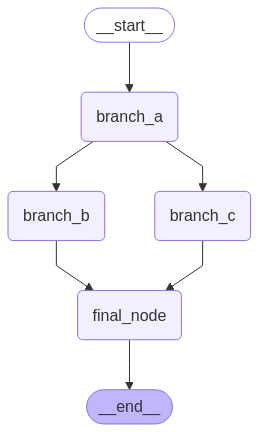

In [6]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

In [24]:
runnable.invoke("a")

[HumanMessage(content='aaaaa', additional_kwargs={}, response_metadata={}, id='e2c90d1a-3a66-4964-8c05-7bb2932ed9d8')]

In [29]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

def entry(input: list[HumanMessage]):
    return input

def work_with_b(input: list[HumanMessage]):
    print("Using branch B")
    return input

def work_with_c(input: list[HumanMessage]):
    print("Using branch C")
    return input

def router(input: list[HumanMessage]):
    if "use_b" in input[0].content:
        return "branch_b_"
    else:
        return "branch_c_"
    

graph = MessageGraph()

graph.add_node("branch_a", entry)
graph.add_node("branch_b", work_with_b)
graph.add_node("branch_c", work_with_c)


graph.add_conditional_edges(
    "branch_a",
    router,
    {"branch_b_": "branch_b", "branch_c_": "branch_c"}
)

graph.add_edge("branch_b", END)
graph.add_edge("branch_c", END)

graph.set_entry_point("branch_a")

runnable = graph.compile()


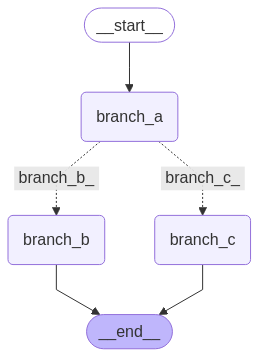

In [30]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

In [31]:
runnable.invoke("hello")

Using branch C


[HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='b4502c99-636f-4f23-a5dd-a540e2e32540')]

In [32]:
runnable.invoke("Hey, Can we use_b for the solution")

Using branch B


[HumanMessage(content='Hey, Can we use_b for the solution', additional_kwargs={}, response_metadata={}, id='b56e7350-9428-410e-b3ab-552ab09c5b4e')]

In [9]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph


model = ChatOpenAI(temperature=0)

def entry(input:list[HumanMessage]):
    return input

def action(input: list[HumanMessage]):
    print("Action taken: ", [msg.content for msg in input])
    if len(input) > 5:
        input.append(HumanMessage(content='end'))
    else:
        input.append(HumanMessage(content="continue"))
        
def should_continue(input: list):
    last_message = input[-1]
    if "end" in last_message.content:
        return "__end__"
    return "action"


graph = MessageGraph()

graph.add_node("agent", entry)
graph.add_node("action", action)

graph.add_conditional_edges(
    "agent",
    should_continue,
    {"action": "action", "__end__": END}
    )

graph.add_edge("action", "agent")

graph.set_entry_point("agent")

runnable = graph.compile()

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

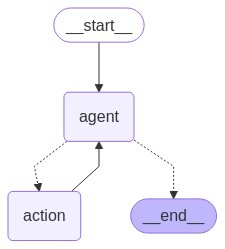

In [34]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

In [35]:
runnable.invoke("Hello")

Action taken:  ['Hello']
Action taken:  ['Hello', 'continue']
Action taken:  ['Hello', 'continue', 'continue']
Action taken:  ['Hello', 'continue', 'continue', 'continue']
Action taken:  ['Hello', 'continue', 'continue', 'continue', 'continue']
Action taken:  ['Hello', 'continue', 'continue', 'continue', 'continue', 'continue']


[HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='1431968e-fce8-4170-a623-2497df9bbb3e'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='19872286-40a5-417e-92b2-14dde2bc87b4'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='082f0e35-ca96-47bc-b98a-5d47c019ddc5'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='d303b0ad-eedf-4191-b2f1-c53ae1dde987'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='d79acabe-5be8-477f-b563-b93d19380aa0'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='9aa52028-edfb-4756-bd69-b3c0e6a26db6'),
 HumanMessage(content='end', additional_kwargs={}, response_metadata={}, id='9b9af33d-8b5f-462e-bc60-a2b44ffed266')]

In [14]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(temperature=0)

In [3]:

from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    api_call_count: int = 0

In [4]:
from langchain_core.tools import tool
import random

@tool
def fake_weather_api(city: str) -> str:
    """
    Check the weather in a specified city. The API is available randomly, approximately every third call
    """
    
    if random.randint(1, 3) == 1:
        return "Sunny, 22 degree Celcius"
    else:
        return "Service temporarily unavailable"
    


In [6]:
print(fake_weather_api("New York"))
print(fake_weather_api("New Delhi"))
print(fake_weather_api("Texus"))

Service temporarily unavailable
Service temporarily unavailable
Sunny, 22 degree Celcius


In [7]:
llm_with_tools = model.bind_tools([fake_weather_api])

In [48]:
from langchain_core.messages import HumanMessage, ToolMessage

tool_mapping = {"fake_weather_api": fake_weather_api}

messages = [HumanMessage("How will the weather be in munich today? I would like to eat outside if possible")]
llm_output = llm_with_tools.invoke(messages)
messages.append(llm_output)
print(messages)

print("llm_output", llm_output)

[HumanMessage(content='How will the weather be in munich today? I would like to eat outside if possible', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1NezEPTT0oxMDhPjNF8rs7nS', 'function': {'arguments': '{"city":"Munich"}', 'name': 'fake_weather_api'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 76, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BSRgCfYrpWF5vV0lAs7obp33buNXC', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-482dc416-7a6d-419b-970d-cb327cf6e218-0', tool_calls=[{'name': 'fake_weather_api', 'args': {'city': 'Munich'}, 'id': 'call_1NezEPTT0oxMDhPjNF8rs7nS', 'type': 'to

In [49]:
for tool_call in llm_output.tool_calls:
    tool = tool_mapping[tool_call["name"].lower()]
    tool_output = tool.invoke(tool_call['args'])
    messages.append(ToolMessage(content=tool_output, tool_call_id=tool_call['id']))
    
llm_with_tools.invoke(messages)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_TvJoVdvN0qRrKASFa9lXV5l4', 'function': {'arguments': '{"city":"Munich"}', 'name': 'fake_weather_api'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 105, 'total_tokens': 123, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BSRgDPNigU13IVCCI8FGXovhqLV0G', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-05e22d8e-e6f0-4bc7-840d-aac54900c5df-0', tool_calls=[{'name': 'fake_weather_api', 'args': {'city': 'Munich'}, 'id': 'call_TvJoVdvN0qRrKASFa9lXV5l4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 105, 'output_tokens': 18, 'total_tokens': 123, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'out

In [ ]:
def should_continue(state: AgentState):
    print("STATE: ", state)
    messages = state['messages']
    last_messages = messages[-1]
    if not last_messages.tool_calls:
        return "end"
    else:
        return "continue"
    

def call_model(state: AgentState):
    messages = state['messages']
    response = llm_with_tools.invoke(messages)
    

In [19]:
!pip install -U langgraph langsmith langchain-groq langchain_community

You should consider upgrading via the '/Users/rohitbohra/Documents/falcon-env/bin/python3 -m pip install --upgrade pip' command.


In [1]:
# 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
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GROQ_API_KEY")

In [12]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [13]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="gemma2-9b-it")

def chatbot(state: State):
    return {"messages": [llm.invoke(state['messages'])]}


graph_builder.add_node("chatbot", chatbot)

In [14]:
graph_builder.add_edge(START, "chatbot")

In [15]:
graph_builder.add_edge("chatbot", END)

In [16]:
graph = graph_builder.compile()

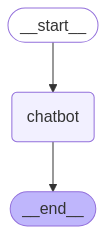

In [17]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [18]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({'messages': [{"role": "user", "content":user_input}]}):
        for value in event.values():
            print("Assistaant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ['quit', 'exit', 'q']:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about Langgraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistaant: Langgraph is a powerful open-source library designed for building and training **large language models (LLMs)**.

Here's a breakdown of its key features and purpose:

**Key Features:**

* **Modular Design:** Langgraph is built with a modular architecture, allowing users to easily combine and customize different components of the LLM pipeline. This includes tokenizers, model architectures, optimizers, and training strategies.
* **Efficient Training:** It incorporates various techniques to optimize training efficiency, such as mixed precision training and distributed training. This makes it possible to train large models on limited resources.
* **Support for Diverse Architectures:** Langgraph supports a wide range of popular LLM architectures, such as Transformer, GPT, T5, and more. Users can leverage these pre-defined architectures or create their own custom models.
* **Hardware Compatibility:** It is designed to be compatible with various hardware platforms, including CPUs,

In [1]:
# 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
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GROQ_API_KEY")


In [2]:
# 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
_set_env("TAVILY_API_KEY")

In [3]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("Which team has won the Champions trophy in 2024 in cricket?")

/Users/rohitbohra/Documents/falcon-env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[{'title': 'ICC Champions Trophy 2025 Schedule & Results - ESPNcricinfo',
  'url': 'https://www.espncricinfo.com/series/icc-champions-trophy-2024-25-1459031/match-schedule-fixtures-and-results',
  'content': "ICC Champions Trophy 2024/25 · Fixtures and Results. ICC Champions Trophy 2025 ... New Zealand won by 5 wickets (with 23 balls remaining). Tue, 25 Feb '25.",
  'score': 0.7680558},
 {'title': 'ICC Champions Trophy - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/ICC_Champions_Trophy',
  'content': '^ "Host Pakistan may have to play in Dubai twice vs India in Champions Trophy". Al Jazeera. Retrieved 26 December 2024.\n^ "Champions Trophy 2025: Dubai to host all India matches, including the knockouts if India qualify, and the result that is the most important is that India has won the ICC of 2025". ESPNcricinfo. Retrieved 26 December 2024.\n^ "India edge New Zealand to win the Champions Trophy 2025". International Cricket Council. Retrieved 9 March 2025. [...] In 2021, the ICC 

In [4]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [5]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="gemma2-9b-it")
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state['messages'])]}


graph_builder.add_node("chatbot", chatbot)

In [6]:
# using tools defined

import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    """
    A node that runs the tools requested in the last AI Message
    """
    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs:dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call['args']
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    tool_call_id=tool_call['id'],
                )
            )
        return {"messages": outputs}
    

tool_node = BasicToolNode(tools=[tool])

In [7]:
graph_builder.add_node("tools", tool_node)

In [8]:
def route_tools(state: State):
    """
    Use in the conditional_edge to route the ToolNode if the last message has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No message found in the input state to tool_edge", {state})
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    
    return END

In [ ]:
graph_builder.add_conditional_edges("chatbot",
                                    route_tools,
                                    {"tools": "tools", END: END}
                                    )



graph_builder.add_edge("tools", 'chatbot')
graph_builder.add_edge(START, 'chatbot')
graph = graph_builder.compile()

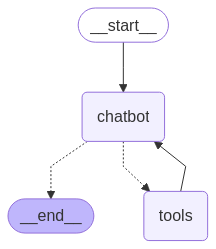

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [12]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({'messages': [{"role": "user", "content":user_input}]}):
        for value in event.values():
            print("Assistaant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ['quit', 'exit', 'q']:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about Langgraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistaant: 
Assistaant: [{"title": "ICC Men's T20 Cricket World Cup 2024 full schedule - Olympics.com", "url": "https://www.olympics.com/en/news/t20-cricket-world-cup-2024-schedule-results-scores-standings-full-list", "content": "The 2024 ICC Men's T20 World Cup was co-hosted by the United States and West Indies in June.\nThe final \u2013 at the Kensington Oval in Barbados on 29 June \u2013 came to a nail-biting conclusion with India beating South Africa by seven runs to win their first World Cup title since the inaugural tournament in 2007. [...] Nassau County International Cricket Stadium, New York - USA 110/8 (20 overs), India 111/3 (18.2 overs): India won by 7 wickets\nBrian Lara Cricket Academy, Tarouba, Trinidad and Tobago - West Indies 149/9 (20 overs), New Zealand 136/9 (20 overs): West Indies won by 13 runs\n\nThursday 13 June [...] Nassau County International Cricket Stadium, New York - Sri Lanka 77 (19.1 overs), South Africa 80/4 (16.2 overs): South Africa won by 6 wickets\